## Time Series: Stock Price

For this project, we will focus on equities data from the Frankfurt Stock Exhange (FSE), which is available for free. We'll try and analyze the stock prices of a company called Carl Zeiss Meditec, which manufactures tools for eye examinations, as well as medical lasers for laser eye surgery: https://www.zeiss.com/meditec/int/home.html. The company is listed under the stock ticker AFX_X. You can find the detailed Quandl API instructions here: https://docs.quandl.com/docs/time-series

In [31]:
# First, import the relevant modules
import requests
import json
import pandas as pd
import os
import matplotlib.pyplot as plt

### Download using Quandl API

In [35]:
url = "https://www.quandl.com/api/v3/datasets/FSE/AFX_X.json" # FSE - database name, AFX_X - dataset name
API_KEY = 'ChHht3EzsUvEPnxUxwZb' #'MY_API_KEY_IS_SECRET'
#params = dict(start_date='2017-01-01', end_date='2017-12-31', api_key=API_KEY)
params = dict(api_key=API_KEY)
res = requests.get(url, params=params)
print(res)
json = res.json()
print(json)

<Response [200]>
{'dataset': {'id': 10095370, 'dataset_code': 'AFX_X', 'database_code': 'FSE', 'name': 'Carl Zeiss Meditec (AFX_X)', 'description': 'Stock Prices for Carl Zeiss Meditec (2020-11-02) from the Frankfurt Stock Exchange.<br><br>Trading System: Xetra<br><br>ISIN: DE0005313704', 'refreshed_at': '2020-12-01T14:48:09.907Z', 'newest_available_date': '2020-12-01', 'oldest_available_date': '2000-06-07', 'column_names': ['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover', 'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover'], 'frequency': 'daily', 'type': 'Time Series', 'premium': False, 'limit': None, 'transform': None, 'column_index': None, 'start_date': '2000-06-07', 'end_date': '2020-12-01', 'data': [['2020-12-01', 112.2, 112.2, 111.5, 112.0, None, 51.0, 5703.0, None, None, None], ['2020-11-30', 111.0, 113.6, 111.0, 112.1, None, 315.0, 35111.5, None, None, None], ['2020-11-27', 111.0, 111.5, 109.5, 111.2, None, 155.0, 17168.5, None, None, N

In [152]:
pydict = dict(json) # Convert the returned JSON object into a Python dictionary
data = pydict['dataset']['data'] # data for all days
df = pd.DataFrame(data) # convert to pandas dataframe
df.columns = pydict['dataset']['column_names'] # set column names
df.head()

,Date,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
0,2020-12-01,112.2,112.2,111.5,112.0,NaN,51.0,5703.0,None,None,NaN
1,2020-11-30,111.0,113.6,111.0,112.1,NaN,315.0,35111.5,None,None,NaN
2,2020-11-27,111.0,111.5,109.5,111.2,NaN,155.0,17168.5,None,None,NaN
3,2020-11-26,111.3,112.0,110.5,111.6,NaN,254.0,28367.5,None,None,NaN
4,2020-11-25,111.4,111.4,110.1,110.1,NaN,294.0,32435.8,None,None,NaN


In [153]:
df.shape

(5268, 11)

In [154]:
print("No. of empty rows in each column")
print("Open:", df['Open'].isna().sum())
print("High:", df['High'].isna().sum())
print("Low:", df['Low'].isna().sum())
print("Close:", df['Close'].isna().sum())
print("Change:", df['Change'].isna().sum()) # drop it
print("Traded Volume:", df['Traded Volume'].isna().sum())
print("Turnover:", df['Turnover'].isna().sum())
print("Last Price of the Day:", df['Last Price of the Day'].isna().sum()) # drop it
print("Daily Traded Units:", df['Daily Traded Units'].isna().sum()) # drop it
print("Daily Turnover", df['Daily Turnover'].isna().sum())

No. of empty rows in each column
Open: 732
High: 401
Low: 401
Close: 0
Change: 5259
Traded Volume: 46
Turnover: 1355
Last Price of the Day: 5268
Daily Traded Units: 5268
Daily Turnover 3959


In [155]:
df['Daily Turnover'].unique() # drop it

array([nan,  0.])

In [156]:
df.drop(['Change','Last Price of the Day','Daily Traded Units','Daily Turnover'], axis=1, inplace=True) # drop columns that are mostly empty
# inplace=True to drop column names
df.set_index('Date')

,Open,High,Low,Close,Traded Volume,Turnover
Date,,,,,,
2020-12-01,112.2,112.2,111.5,112.0,51.0,5703.0
2020-11-30,111.0,113.6,111.0,112.1,315.0,35111.5
2020-11-27,111.0,111.5,109.5,111.2,155.0,17168.5
2020-11-26,111.3,112.0,110.5,111.6,254.0,28367.5
2020-11-25,111.4,111.4,110.1,110.1,294.0,32435.8
...,...,...,...,...,...,...
2000-06-13,NaN,NaN,NaN,45.0,0.0,NaN
2000-06-12,NaN,NaN,NaN,45.0,0.0,NaN
2000-06-09,NaN,NaN,NaN,45.0,0.0,NaN


In [157]:
df.head()

,Date,Open,High,Low,Close,Traded Volume,Turnover
0,2020-12-01,112.2,112.2,111.5,112.0,51.0,5703.0
1,2020-11-30,111.0,113.6,111.0,112.1,315.0,35111.5
2,2020-11-27,111.0,111.5,109.5,111.2,155.0,17168.5
3,2020-11-26,111.3,112.0,110.5,111.6,254.0,28367.5
4,2020-11-25,111.4,111.4,110.1,110.1,294.0,32435.8


In [8]:
os.chdir('C:/Sereda/Lectures/Springboard/Projects/Capstone2')

In [166]:
df.to_csv('FSE.AFX_X.csv', index=False)

### Open saved data and convert into time series

In [91]:
os.chdir('C:/Sereda/Lectures/Springboard/Projects/7.6.Capstone2_Data_Wrangling')
df = pd.read_csv('FSE.AFX_X.csv')
print(df.columns)
print(df.head())

Index(['unique_id', 'Date', 'Open', 'High', 'Low', 'Close', 'Traded Volume',
       'Turnover'],
      dtype='object')
   unique_id        Date   Open   High    Low  Close  Traded Volume  Turnover
0          0   12/1/2020  112.2  112.2  111.5  112.0           51.0    5703.0
1          1  11/30/2020  111.0  113.6  111.0  112.1          315.0   35111.5
2          2  11/27/2020  111.0  111.5  109.5  111.2          155.0   17168.5
3          3  11/26/2020  111.3  112.0  110.5  111.6          254.0   28367.5
4          4  11/25/2020  111.4  111.4  110.1  110.1          294.0   32435.8


In [9]:
# Inspect data types and completeness
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   unique_id      5268 non-null   int64  
 1   Date           5268 non-null   object 
 2   Open           4536 non-null   float64
 3   High           4867 non-null   float64
 4   Low            4867 non-null   float64
 5   Close          5268 non-null   float64
 6   Traded Volume  5222 non-null   float64
 7   Turnover       3913 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 308.7+ KB


In [93]:
# Convert the date column to datetime64
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   unique_id      5268 non-null   int64         
 1   Date           5268 non-null   datetime64[ns]
 2   Open           4536 non-null   float64       
 3   High           4867 non-null   float64       
 4   Low            4867 non-null   float64       
 5   Close          5268 non-null   float64       
 6   Traded Volume  5222 non-null   float64       
 7   Turnover       3913 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 329.3 KB


To convert object into Time Series, set the date column as index. Many Series/DataFrame methods rely on time information in the index to provide time-series functionality.

In [94]:
# Set date column as index
df.set_index('Date', inplace=True)
df.head()

,unique_id,Open,High,Low,Close,Traded Volume,Turnover
Date,,,,,,,
2020-12-01,0,112.2,112.2,111.5,112.0,51.0,5703.0
2020-11-30,1,111.0,113.6,111.0,112.1,315.0,35111.5
2020-11-27,2,111.0,111.5,109.5,111.2,155.0,17168.5
2020-11-26,3,111.3,112.0,110.5,111.6,254.0,28367.5
2020-11-25,4,111.4,111.4,110.1,110.1,294.0,32435.8


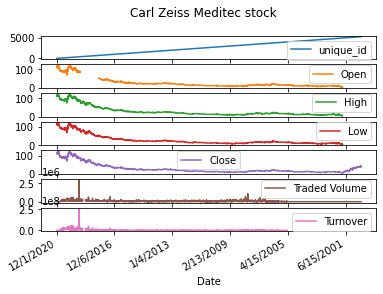

In [34]:
# Plot data
df.plot(title='Carl Zeiss Meditec stock', subplots=True);
plt.show()

### Filter columns

Let's focus on closing stock price, 'Close'.

<b>Problem 1: Saved DF subset into another variable, but that variable is not functional</b>

In [95]:
type(df)

pandas.core.frame.DataFrame

In [78]:
TS = df.drop(['unique_id', 'Open','High','Low', 'Traded Volume','Turnover'], axis=1, inplace=False) # drop columns not used in analysis
TS = TS.sort_values(by=['Date']) # sort by date
TS.head()

,Close
Date,
1/1/2001,21.50
1/1/2002,9.00
1/1/2003,9.15
1/1/2004,12.41
1/1/2007,15.80


In [63]:
TS.index

Index(['1/1/2001', '1/1/2002', '1/1/2003', '1/1/2004', '1/1/2007', '1/1/2008',
       '1/1/2009', '1/1/2010', '1/1/2016', '1/10/2001',
       ...
       '9/9/2008', '9/9/2009', '9/9/2010', '9/9/2011', '9/9/2013', '9/9/2014',
       '9/9/2015', '9/9/2016', '9/9/2019', '9/9/2020'],
      dtype='object', name='Date', length=5268)

In [81]:
print(type(df))
print(type(TS))
print(type(TS.index))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.indexes.base.Index'>


In [40]:
#TS.columns = ['ds','y'] # rename columns

In [82]:
TS.describe() # Descriptive statistics

,Close
count,5268.000000
mean,27.515420
std,25.430039
min,4.070000
25%,11.590000
50%,17.250000
75%,28.935000
max,123.200000


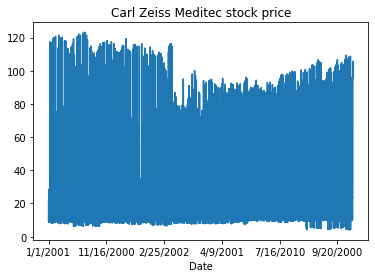

In [83]:
TS.Close.plot(title='Carl Zeiss Meditec stock price')
#plt.ylabel('$')
plt.show()

<b>The plot is incorrect!</b>

<b>Partial string indexing:</b>
To select subsets of your time series, you can use strings that represent a complete date, or relevant parts of a date.
If you just pass a string representing a year, pandas returns all dates within this year.

In [96]:
df.Close['2015-02']

Date
2015-02-27    24.57
2015-02-26    24.55
2015-02-25    24.72
2015-02-24    24.60
2015-02-23    24.55
2015-02-20    24.60
2015-02-19    24.70
2015-02-18    24.81
2015-02-17    24.50
2015-02-16    24.98
2015-02-13    24.75
2015-02-12    24.93
2015-02-11    24.16
2015-02-10    23.83
2015-02-09    23.56
2015-02-06    23.90
2015-02-05    24.50
2015-02-04    23.86
2015-02-03    23.99
2015-02-02    23.18
Name: Close, dtype: float64

<b>Partial string indexing doesn't work!<br>
OK, let's try dropping columns inplace.</b>

In [97]:
df.head()

,unique_id,Open,High,Low,Close,Traded Volume,Turnover
Date,,,,,,,
2020-12-01,0,112.2,112.2,111.5,112.0,51.0,5703.0
2020-11-30,1,111.0,113.6,111.0,112.1,315.0,35111.5
2020-11-27,2,111.0,111.5,109.5,111.2,155.0,17168.5
2020-11-26,3,111.3,112.0,110.5,111.6,254.0,28367.5
2020-11-25,4,111.4,111.4,110.1,110.1,294.0,32435.8


In [98]:
df.drop(['unique_id', 'Open','High','Low', 'Traded Volume','Turnover'], axis=1, inplace=True) # drop columns not used in analysis
df.head()

,Close
Date,
2020-12-01,112.0
2020-11-30,112.1
2020-11-27,111.2
2020-11-26,111.6
2020-11-25,110.1


In [100]:
TS = df.sort_values(by=['Date']) # sort by date
TS.head()

,Close
Date,
2000-06-07,38.0
2000-06-08,38.0
2000-06-09,45.0
2000-06-12,45.0
2000-06-13,45.0


In [102]:
TS.Close['2016'] # Pass string for part of date

Date
2016-01-01    28.55
2016-01-04    27.96
2016-01-05    28.21
2016-01-06    28.15
2016-01-07    26.98
              ...  
2016-12-26    35.03
2016-12-27    35.41
2016-12-28    35.30
2016-12-29    34.94
2016-12-30    35.00
Name: Close, Length: 260, dtype: float64

In [105]:
TS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5268 entries, 2000-06-07 to 2020-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5268 non-null   float64
dtypes: float64(1)
memory usage: 82.3 KB


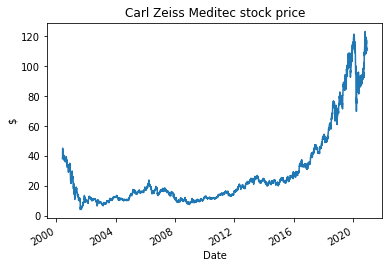

In [107]:
TS.Close.plot(title='Carl Zeiss Meditec stock price')
plt.ylabel('$')
plt.show()

Note that the date range is <b>inclusive of the end date</b>, unlike other intervals in Python.

In [112]:
ts = TS['2015-3': '2016-2'] # Slice of time
ts

,Close
Date,
2015-03-02,24.50
2015-03-03,24.02
2015-03-04,24.15
2015-03-05,24.12
2015-03-06,24.09
...,...
2016-02-23,28.58
2016-02-24,29.21
2016-02-25,29.12


In [113]:
ts.info() # Slice includes last month

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 257 entries, 2015-03-02 to 2016-02-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   257 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


In [116]:
TS.loc['2016-6-1', 'Close']

35.08

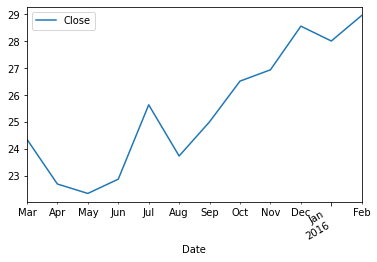

In [119]:
# Set frequency to monthly
mo = ts.asfreq('M', method='bfill') # without filling, when there is no data for the last day of the month, would have NULL

# Plot monthly data
mo.plot(subplots=True);
plt.show()

TS time series is ready for analysis ...

## References
<a name='ref1'>[1]</a> Financial Data API.
https://data.nasdaq.com/tools/api

## Time Series: Demand Forecasting for Bakery

<b>Problem 2: image is not displayed, both when using a command and img tag:</b>

![](jpg/bakery.jpg)
![](jpg/chedraui-bakery-1.jpg)

<img src="jpg/bakery.jpg"/> <img src="jpg/chedraui-bakery-1.jpg"/>

Let's focus on bakery demand forecasting for <b>Chedraui supermarket in Playa del Carmen</b>, Mexico.

In [122]:
shop = "CHEDRAUI PLAYA DEL CARMEN"

Find it in the list of 935362 clients of Grupo Bimbo bakery producer.

In [128]:
df=pd.read_csv('csv.grupo_bimbo/cliente_tabla.csv')
df.head()

,Cliente_ID,NombreCliente
0,0,SIN NOMBRE
1,1,OXXO XINANTECATL
2,2,SIN NOMBRE
3,3,EL MORENO
4,4,SDN SER DE ALIM CUERPO SA CIA DE INT


Determine ID of our shop.

In [193]:
tmp = df[df.NombreCliente == shop]
tmp

,Cliente_ID,NombreCliente
48214,116501,CHEDRAUI PLAYA DEL CARMEN


In [192]:
type(tmp)

pandas.core.frame.DataFrame

In [194]:
# convert dataframe to a scalar
id = tmp.iloc[0,0].item()
id

116501

In [204]:
del df # clean memory

### Products (bakery)

In [203]:
products=pd.read_csv('csv.grupo_bimbo/producto_tabla.csv')
products.head()

,Producto_ID,NombreProducto
0,0,NO IDENTIFICADO 0
1,9,Capuccino Moka 750g NES 9
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41
3,53,Burritos Sincro 170g CU LON 53
4,72,Div Tira Mini Doradita 4p 45g TR 72


In [228]:
def product_name(Producto_ID):
    tmp = products[products.Producto_ID == Producto_ID]
    return tmp.iloc[0,1]

In [229]:
product_name(41)

'Bimbollos Ext sAjonjoli 6p 480g BIM 41'

### Bakery Demand data

Extract data from a large *.csv

In [ ]:
df=pd.read_csv('bakery.csv', parse_dates=['Date'], index_col='Date')
df.info()